### NLP
### Assignment 1

### 1. Libraries

In [1]:
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import numpy as np # linear algebra
import os # used for file manipulation
import sys # used for file manipulation
import re # used for regular expression
from urllib import request

#### Helper custom fuctions


In [2]:
# Helper class to download and read the dataset
class Helper:
    def __init__(self, path, id_path):
        self.path = path
        self.id_path = id_path

    def download_dataset(self):
        # Download the dataset
        url = f"https://drive.google.com/uc?export=download&id={self.id_path}"
        request.urlretrieve(url, self.path)

    def read_dataset(self, path):
        # Read the dataset
        def read_lines(lines):
            is_header = True
            for line in lines:
                if is_header:
                    is_header = False
                    continue

                if not line or line.isspace():
                    is_header = True
                    continue

                label, comment = line.split(maxsplit=1)
                yield comment, int(label)

        with open(path,encoding='utf-8') as file:
            data = read_lines(file)
            df = pd.DataFrame.from_records(data, columns=["text", "label"])

        return df

#### Donwload the data from the following link and read the data from the file.

In [3]:
# Dowload the data from the source

helper = Helper(
    path='dataset',
    id_path='13XlJ4uhxxGprn6mnXwXNvV9PxSNyZCsY'
)

helper.download_dataset()
df = helper.read_dataset('dataset')
df.head()


,text,label
0,It's because Europeans do not want to change t...,0
1,The Muslims there do not want to assimilate pr...,0
2,But it's ok....because Europe will soon rebel ...,1
3,I forsee a big civil war in Europe in the futu...,0
4,"ISLAM – A Simple, Humanitarian and Attractive ...",0


### 2. Data Analysis

In [4]:
df['label'].value_counts()


0    27256
1     1387
Name: label, dtype: int64

In [5]:
# check for missing values

df.isnull().sum()

text     0
label    0
dtype: int64

In [6]:
# check for duplicate values
df.duplicated().sum()

352

In [7]:
# check for the distribution of the labels
df['label'].value_counts()

0    27256
1     1387
Name: label, dtype: int64

In [8]:
# check for all the special characters
df['text'].str.extractall(r'([^a-zA-Z\s])')[0].value_counts()


.    27248
,    16314
'     7006
!     6092
?     3846
     ...  
μ        1
ύ        1
ď        1
ז        1
ú        1
Name: 0, Length: 257, dtype: int64

In [9]:
from collections import Counter
import matplotlib.pyplot as plt

# Count the number of words in each comment
df['word_count'] = df['text'].apply(lambda x: len(x.split()))

# Count the number of characters in each comment
df['char_count'] = df['text'].apply(lambda x: len(x))

# Count the number of special characters in each comment
df['special_char_count'] = df['text'].apply(lambda x: len([c for c in x if c in ('!','@','#','$','%','^','&','*','(',')','_','+','{','}','|',':','"','<','>','?','`','~',';',',','.','/','\\','[',']')]))

# Count the number of numerics in each comment
df['numerics_count'] = df['text'].apply(lambda x: len([c for c in x if c.isdigit()]))

# Count the number of uppercase words in each comment
df['upper_count'] = df['text'].apply(lambda x: len([c for c in x if c.isupper()]))

# Count the number of lowercase words in each comment
df['lower_count'] = df['text'].apply(lambda x: len([c for c in x if c.islower()]))

# Count the number of words in each comment
df['word_count'] = df['text'].apply(lambda x: len(x.split()))

# Count the number of stopwords in each comment
from nltk.corpus import stopwords
stop = stopwords.words('english')
df['stopwords_count'] = df['text'].apply(lambda x: len([c for c in x.split() if c in stop]))

# Count the number of unique words in each comment
df['unique_words_count'] = df['text'].apply(lambda x: len(set(x.split())))
df.head()



,text,label,word_count,char_count,special_char_count,numerics_count,upper_count,lower_count,stopwords_count,unique_words_count
0,It's because Europeans do not want to change t...,0,20,111,1,0,3,86,11,18
1,The Muslims there do not want to assimilate pr...,0,18,107,1,0,4,84,7,18
2,But it's ok....because Europe will soon rebel ...,1,24,132,6,0,3,98,14,21
3,I forsee a big civil war in Europe in the futu...,0,18,94,2,0,3,71,8,16
4,"ISLAM – A Simple, Humanitarian and Attractive ...",0,8,55,1,0,10,35,1,8


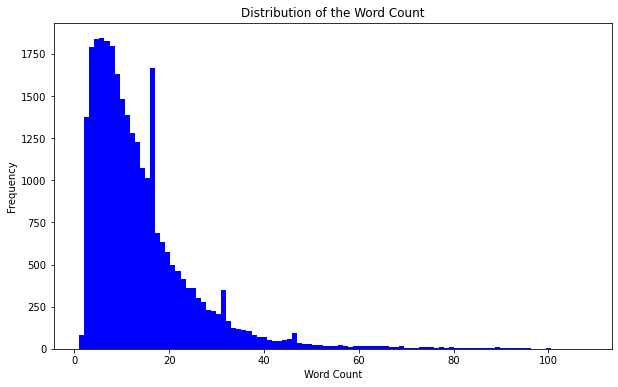

In [10]:
# Plot the distribution of the word count

plt.figure(figsize=(10, 6))
plt.hist(df['word_count'], bins=100, color='blue')
plt.title('Distribution of the Word Count')
plt.xlabel('Word Count')
plt.ylabel('Frequency')
plt.show()

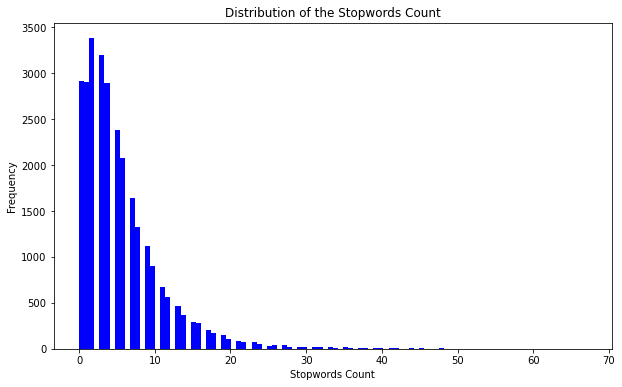

In [11]:
# Plot the distribution of the stopword count
# Plot the distribution of the stopword count
plt.figure(figsize=(10, 6))
plt.hist(df['stopwords_count'], bins=100, color='blue')
plt.title('Distribution of the Stopwords Count')
plt.xlabel('Stopwords Count')
plt.ylabel('Frequency')
plt.show()

### 3. Perform Clean up and data analysis

In [12]:
import nltk
from nltk.tokenize import sent_tokenize
import string
from nltk.corpus import stopwords
from nltk import word_tokenize

from wordcloud import WordCloud

In [13]:
#sentence tokinization

#this cell is just to understand how sent_token works

df['sent_token']=df.text.apply(sent_tokenize)

In [14]:
df[df.sent_token.str.len()>4]

,text,label,word_count,char_count,special_char_count,numerics_count,upper_count,lower_count,stopwords_count,unique_words_count,sent_token
8730,SO DONT GET YOUR HOPES TOO HIGH !!!!!YOU GONNA...,0,35,213,30,0,131,17,0,34,"[SO DONT GET YOUR HOPES TOO HIGH !!!!, !YOU GO..."
10482,yea my bro!!!!RUSSIA IS THE BEST!!!!LONG LIVE ...,0,20,172,38,0,106,8,1,19,"[yea my bro!!!, !RUSSIA IS THE BEST!!!, !LONG ..."
10512,I agre my bro!!!!FUCK THE ISLAM!!!!!Greetings ...,1,29,250,55,0,89,77,8,26,"[I agre my bro!!!, !FUCK THE ISLAM!!!!, !Greet..."
10517,"and i well fuck you with big,biger and bigest ...",0,27,224,36,0,93,68,7,25,"[and i well fuck you with big,biger and bigest..."
10520,SERBIA suportetd you my BRO!!!!!!!!KILL MUSLIM...,1,10,109,36,0,49,14,2,10,"[SERBIA suportetd you my BRO!!!!!!!, !KILL MUS..."
10586,FUCK YOU MOTHERFUCKER!!!!!!!WEE WEELL KILL YOU...,1,20,161,31,0,110,0,0,16,"[FUCK YOU MOTHERFUCKER!!!!!!, !WEE WEELL KILL ..."
19126,"u see, i dont understand why ppl like to make ...",0,38,195,20,0,0,133,9,34,"[u see, i dont understand why ppl like to make..."


In [15]:
#removing other non alphabetic words 

df['word_english_aplha']=df['text'].replace('[^\w\s]','')

# this cell explains how the regex or methods are not effective on the removal of arabic letters

In [16]:
df[df['word_english_aplha'].str.contains('ٱلس')]

,text,label,word_count,char_count,special_char_count,numerics_count,upper_count,lower_count,stopwords_count,unique_words_count,sent_token,word_english_aplha
17247,وَٱلسَّمَآءَ بَنَيۡنَـٰهَا بِأَيۡيْدٍ۬ وَإِنّ...,0,5,62,0,0,0,0,0,5,[وَٱلسَّمَآءَ بَنَيۡنَـٰهَا بِأَيۡيْدٍ۬ وَإِن...,وَٱلسَّمَآءَ بَنَيۡنَـٰهَا بِأَيۡيْدٍ۬ وَإِنّ...


In [17]:
#this handles special charcter and space issues --> this needs to added inisde a function

df['text'] = df['text'].apply(lambda x: re.sub('\n','',x))
#removing unwanted characters.
# not using ,. because it might lead to joining to words if there is no space
df['text'] = df['text'].apply(lambda x: ''.join([y.lower() for y in x if y.isalpha() or y in " ,.'"]))
#remove the . and , and make sure there is a space in between
df['text'] = df['text'].apply(lambda x: re.sub(r'[\,\.\']',' ',x))

In [19]:
def clean_column(dataframe):

    """
    arg: passing the text column
    
    function: check for non-alpha values using ascii method, remove digits, remove punctuation, special characters,
    word tokenization,stopword removal and unwanted white space
    
    return: new column named cleaned_v_1
    """
    #making sure we are just passing the right column onlu
    comment= dataframe.text
    # removing no alpha values
    comment = re.sub(r'[^\w\s,]', '', comment)
    #removing new line character 
    comment = re.sub(r'\n','',comment)
        #removing unwanted characters.
    # not using ,. because it might lead to joining to words if there is no space
    comment=''.join([y.lower() for y in comment if y.isalpha() or y in " ,.'"])
    #removing . , / and other special character
    comment= re.sub(r'[\,\.\']',' ',comment)
    # digits and non- ascii value removal --> as our text contains non-english words
    comment = re.sub(r'\d+', '', comment)
    comment = ''.join(letter for letter in comment if ord(letter) < 128)
    # punctuation
    comment = comment.translate(str.maketrans('', '', string.punctuation))
    #extra white spaces are found, revoming that
    comment = re.sub(r'\s{2,}', '', comment)
    #initializing the stop words present in NLTK lib
    stop_words=stopwords.words('english')
    #adding few stopwords using extend method
    addd=[ 'd','ll', 'm', 'o', 're', 've', 'y', 'ma','even','ur','u']
   
    #set is used to remove the stopwords easily
    stop_words=set(stop_words)
    # after doing research on the stopwords, we are  modifying the stopwords to avoid deleting the negations
    remov_list=["wouldn't","wouldn","won't","won","weren't","weren","wasn't","wasn","shouldn't","shouldn","shan't","shan","needn't","needn","mustn't","mustn","mightn't","mightn","isn't","isn","haven't","haven","hasn't","hasn","hadn't","hadn","doesn't","didn't","didn","couldn't","couldn","aren't","aren","ain","don't","don","not","no","nor"]
    for words in remov_list:
        stop_words.discard(words)
    for words in addd:
        stop_words.add(words)
    token = word_tokenize(comment.lower())
    
    token = [word for word in token if word not in stop_words]
    token=" ".join(token)
    
    if not token:
      return np.NaN #creating nan values for the empty string length
    return token

df['cleaned_v_1'] = df.apply(clean_column, axis=1)

In [20]:
def token_(text):
    """
    arg: passing the cleaned_v_1 column
    
    function: creating a word_token column with empty list for nan values
    
    return: new column named word_tokens
    """
    #checking for text cell only
    if isinstance(text,str): 
        word_tok=word_tokenize(text.lower())
        return(word_tok)
    #for empty cell
    else:
        return([])

df['word_tokens']=df['cleaned_v_1'].apply(token_)

In [21]:
#chekcing the non-english word removal

df.iloc[17247]['cleaned_v_1']

nan

In [22]:
#applying lemma (verb)
from nltk.stem import WordNetLemmatizer
lem = WordNetLemmatizer()
lem.lemmatize('dove',pos = 'v')

'dive'

### experiment 1 --> lemma --> verb

In [23]:
df['word_tokens_v'] = df['word_tokens'].apply(lambda x: [lem.lemmatize(y,pos='v') for y in x])

In [24]:
df

,text,label,word_count,char_count,special_char_count,numerics_count,upper_count,lower_count,stopwords_count,unique_words_count,sent_token,word_english_aplha,cleaned_v_1,word_tokens,word_tokens_v
0,it s because europeans do not want to change t...,0,20,111,1,0,3,86,11,18,[It's because Europeans do not want to change ...,It's because Europeans do not want to change t...,europeans not want change way life customs mak...,"[europeans, not, want, change, way, life, cust...","[europeans, not, want, change, way, life, cust..."
1,the muslims there do not want to assimilate pr...,0,18,107,1,0,4,84,7,18,[The Muslims there do not want to assimilate p...,The Muslims there do not want to assimilate pr...,muslims not want assimilate properly european ...,"[muslims, not, want, assimilate, properly, eur...","[muslims, not, want, assimilate, properly, eur..."
2,but it s ok because europe will soon rebel ...,1,24,132,6,0,3,98,14,21,[But it's ok....because Europe will soon rebel...,But it's ok....because Europe will soon rebel ...,okbecause europe soon rebel themjust like spai...,"[okbecause, europe, soon, rebel, themjust, lik...","[okbecause, europe, soon, rebel, themjust, lik..."
3,i forsee a big civil war in europe in the futu...,0,18,94,2,0,3,71,8,16,[I forsee a big civil war in Europe in the fut...,I forsee a big civil war in Europe in the futu...,forsee big civil war europe futurebecause musl...,"[forsee, big, civil, war, europe, futurebecaus...","[forsee, big, civil, war, europe, futurebecaus..."
4,islam a simple humanitarian and attractive r...,0,8,55,1,0,10,35,1,8,"[ISLAM – A Simple, Humanitarian and Attractive...","ISLAM – A Simple, Humanitarian and Attractive ...",islama simplehumanitarian attractive religion,"[islama, simplehumanitarian, attractive, relig...","[islama, simplehumanitarian, attractive, relig..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28638,yeah we are all monsters i m gonna kill u rig...,1,10,56,5,0,1,39,3,10,[yeah we are all monsters..I'm gonna kill u ri...,yeah we are all monsters..I'm gonna kill u rig...,yeah monstersi gon na kill right,"[yeah, monstersi, gon, na, kill, right]","[yeah, monstersi, gon, na, kill, right]"
28639,stupid brainwashed idiot,0,3,27,2,0,0,22,0,3,[stupid brainwashed idiot..],stupid brainwashed idiot..\n,stupid brainwashed idiot,"[stupid, brainwashed, idiot]","[stupid, brainwash, idiot]"
28640,have you ever been to serbia or kosovo fucki...,0,13,79,8,0,9,48,7,13,[have you EVER been to Serbia or kosovo...fuck...,have you EVER been to Serbia or kosovo...fucki...,ever serbia kosovofucking idiotu don know shit,"[ever, serbia, kosovofucking, idiotu, don, kno...","[ever, serbia, kosovofucking, idiotu, don, kno..."
28641,probably u mean to this monsters fucker watch...,0,8,62,3,2,4,43,2,8,"[probably u mean to this monsters, fucker /wat...","probably u mean to this monsters, fucker /watc...",probably mean monstersfucker watchvvwrvmzjc,"[probably, mean, monstersfucker, watchvvwrvmzjc]","[probably, mean, monstersfucker, watchvvwrvmzjc]"


In [25]:
def word_cloud_label(col_name,lab,colr):
    """
    arg: passing the column name, label required, color of the plot
    
    function: word cloud
    
    return: plt.show()
    """
    word = df[df['label']==lab][col_name].tolist()
    if col_name=='word_tokens':
        word = [flatt for ls in word for flatt in ls]

    word = ' '.join(word)
    # Create and generate a word cloud image:
    wordcloud_ = WordCloud(width=800, height=400,background_color=colr).generate(word)
    # Display the generated image:
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud_, interpolation='bilinear')
    plt.axis("off")
    plt.show()

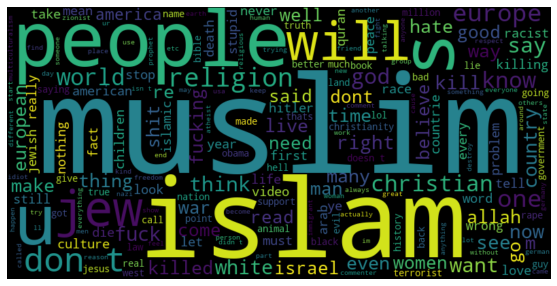

In [26]:
#unprocessed text word cloud --> non-toxic

word_cloud_label('text',0,'black')

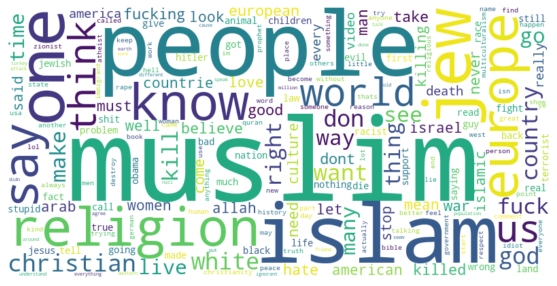

In [27]:
#processed word-token word cloud--> non-toxic

word_cloud_label('word_tokens',0,'white')

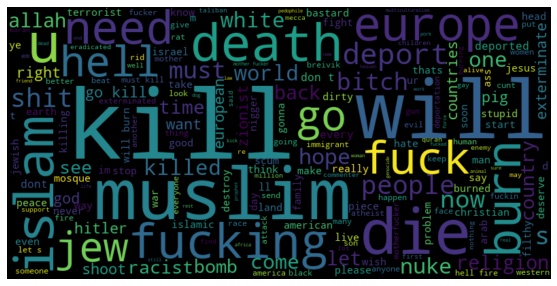

In [28]:
#unprocessed text word cloud ==> toxi

word_cloud_label('text',1,'black')

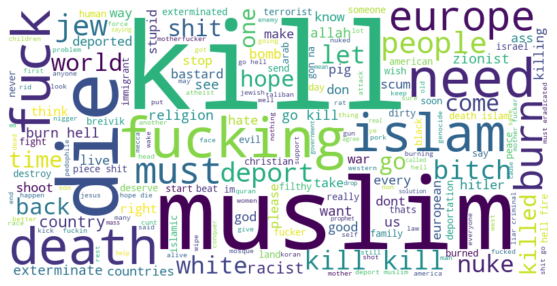

In [29]:
#processed word-token word cloud--> toxic

word_cloud_label('word_tokens',1,'white')

In [30]:
def data_info(df_):
    print(df_.info(),'\n',"="*50,'\n')
    print(df_.shape,'\n',"="*50,'\n')
    print(df_.size,'\n',"="*50,'\n')
    print(df.columns,'\n',"="*50,'\n')
    print(df.isnull().sum(),'\n',"="*50,'\n')

In [31]:
data_info(df)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28643 entries, 0 to 28642
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   text                28643 non-null  object
 1   label               28643 non-null  int64 
 2   word_count          28643 non-null  int64 
 3   char_count          28643 non-null  int64 
 4   special_char_count  28643 non-null  int64 
 5   numerics_count      28643 non-null  int64 
 6   upper_count         28643 non-null  int64 
 7   lower_count         28643 non-null  int64 
 8   stopwords_count     28643 non-null  int64 
 9   unique_words_count  28643 non-null  int64 
 10  sent_token          28643 non-null  object
 11  word_english_aplha  28643 non-null  object
 12  cleaned_v_1         28554 non-null  object
 13  word_tokens         28643 non-null  object
 14  word_tokens_v       28643 non-null  object
dtypes: int64(9), object(6)
memory usage: 3.3+ MB
None 

(28643, 15) 

4296

### work from here

In [32]:
"""
column_description: 

1. cleaned_v_1 --> cleaned text in string type
2. word tokens --> list of words
3. word_tokens_v --> list of lemma words in verb
4. word_tokens_n --> list of lemma words in noun
"""

'\ncolumn_description: \n\n1. cleaned_v_1 --> cleaned text in string type\n2. word tokens --> list of words\n3. word_tokens_v --> list of lemma words in verb\n4. word_tokens_n --> list of lemma words in noun\n'

In [43]:
df['cleaned_v_1'] = df['cleaned_v_1'].fillna('') #handling the value error for np.NaN values in the text

In [44]:
## now we need to apply the vectorization techniques

#Bag of words 
#TF-IDF

In [47]:
# Apply bag of words to the dataset

from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer()
bag_of_words = cv.fit_transform(df['cleaned_v_1']).toarray()


In [48]:
cv.get_feature_names_out()

array(['aaaaaaah', 'aaaand', 'aabortion', ..., 'zyklon', 'zypernfrage',
       'zzz'], dtype=object)

In [49]:
feature_names = cv.get_feature_names_out()
pd.DataFrame(bag_of_words, columns = feature_names)

,aaaaaaah,aaaand,aabortion,aacademic,aah,aallah,aan,aanalong,aand,aandraag,...,zulus,zum,zusammenleben,zustnde,zwaar,zweig,zwishen,zyklon,zypernfrage,zzz
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28638,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
28639,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
28640,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
28641,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## adding danilo model

### 3. Model Building Mock

In [50]:
## we need to update this ernie

dataset_mock = df[['text', 'label']].copy()

dataset_mock.head()

,text,label
0,it s because europeans do not want to change t...,0
1,the muslims there do not want to assimilate pr...,0
2,but it s ok because europe will soon rebel ...,1
3,i forsee a big civil war in europe in the futu...,0
4,islam a simple humanitarian and attractive r...,0


 ### 3.1 Data Cleaning and Preprocessing

In [51]:
## Check Duplicate Values
import pprint

pprint.pprint(dataset_mock[dataset_mock.duplicated()])

## Remove Duplicate Values
dataset_mock.drop_duplicates(inplace=True)


                                                    text  label
29     islam  a simple  humanitarian and attractive r...      0
30                                    welcome to islam        0
31                            and please read the quran       0
32     islam had the power of peacefully conquering s...      0
33     in contrast to christianity which has been und...      0
...                                                  ...    ...
28305                                  death to zionism       1
28312                                 may jesus help us       0
28354  denne kommentaren har fått for mange negative ...      0
28597                                      kill them all      1
28616                                     kill them all       1

[459 rows x 2 columns]


In [52]:
pprint.pprint(dataset_mock[dataset_mock.duplicated()])

Empty DataFrame
Columns: [text, label]
Index: []


## added danilo's comment present in that notebook

For now, I will create a function to clean the data text, and then I will use it to train the model. Although this should ideally be done in separate steps, I will proceed with both tasks in a single step for now.

I won't be using any stemming just lemmatization for now.

In [53]:

# Move this libarries to
import pandas as pd
import re

def clean_text(text):
    # Convert to lowercase
    text = text.lower()

    # Remove special characters and numbers
    text = re.sub(r'[^a-zA-Z\s]', '', text)

    return text

In [54]:
dataset_mock['cleaned_text'] = df['text'].apply(clean_text)

In [55]:
dataset_mock.tail()

,text,label,cleaned_text
28638,yeah we are all monsters i m gonna kill u rig...,1,yeah we are all monsters i m gonna kill u rig...
28639,stupid brainwashed idiot,0,stupid brainwashed idiot
28640,have you ever been to serbia or kosovo fucki...,0,have you ever been to serbia or kosovo fucki...
28641,probably u mean to this monsters fucker watch...,0,probably u mean to this monsters fucker watch...
28642,the fucking funniest thing is that fucking ame...,0,the fucking funniest thing is that fucking ame...


### Experiment 1:Lemmatization and POS tagging

- stemming - > NO
- Lowercasing -> Yes
- Removing special characters -> Yes
- Tokenization-> Yes


In [56]:
from nltk import pos_tag, word_tokenize
from nltk.corpus import stopwords, wordnet
from nltk.stem import WordNetLemmatizer

class LemmaTokenizer:
    def __init__(self):
        self.download_assets()
        self.wnl = WordNetLemmatizer()
        self.stopwords = set(stopwords.words("english"))

    @classmethod
    def download_assets(cls)->None:
        """
        Download the necessary assets for the tokenizer

        :return: None
        """
        nltk.download("stopwords", quiet=True)
        nltk.download("wordnet", quiet=True)
        nltk.download("punkt", quiet=True)
        nltk.download("omw-1.4", quiet=True)
        nltk.download("averaged_perceptron_tagger", quiet=True)

    def __call__(self, doc):
        """
        Tokenize and lemmatize the document

        :param doc: The document to tokenize and lemmatize

        :return: The tokenized and lemmatized document
        """
        nltk_tagged = pos_tag(word_tokenize(doc))
        wordnet_tagged = ((x[0], self.nltk_pos_tagger(x[1])) for x in nltk_tagged)

        return [
            self.wnl.lemmatize(token, tag)
            for token, tag in wordnet_tagged
            if token not in self.stopwords and any(c.isalpha() for c in token)
        ]

    def nltk_pos_tagger(self, nltk_tag):
        """
        Convert the nltk tag to wordnet tag

        :param nltk_tag: The nltk tag

        :return: The wordnet tag
        """
        if nltk_tag.startswith("J"):
            return wordnet.ADJ
        elif nltk_tag.startswith("V"):
            return wordnet.VERB
        elif nltk_tag.startswith("N"):
            return wordnet.NOUN
        elif nltk_tag.startswith("R"):
            return wordnet.ADV
        else:
            return wordnet.NOUN

#### Split the data into train and test

In [57]:
#Move to the top
from sklearn.model_selection import train_test_split

def split_data(df, test_size):
    """
    Split the data into training and testing

    :param df: The dataframe to split
    :param test_size: The size of the testing data

    :return: The training and testing data
    """
    if not isinstance(df, pd.DataFrame):
        raise ValueError("df must be a pandas DataFrame")

    if not isinstance(test_size, float):
        raise ValueError("test_size must be a float")
    
    if test_size <= 0 or test_size >= 1:
        raise ValueError("test_size must be a float between 0 and 1")
    
    # Check in the columns are present
    if "text" not in df.columns or "label" not in df.columns:
        raise ValueError("df must have a 'text' and 'label' column")
    else:
        x_raw, y = df["text"], df["label"]
        x_train, x_test, y_train, y_test = train_test_split(
            x_raw.values, y.values, test_size=test_size, stratify=y, random_state=0
        )
        x_train, x_test = x_train.flatten(), x_test.flatten()
        return x_train, x_test, y_train, y_test
    


In [58]:
test_size = 0.1
x_train, x_test, y_train, y_test = split_data(dataset_mock, test_size)

#### Vectorization and Tokenization

In [59]:
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer(
    tokenizer=LemmaTokenizer(),
    strip_accents="unicode", # Remove accents and perform other character normalization
    ngram_range=(1, 2), # Use unigrams and bigrams
    min_df=0.0005, # Ignore terms that have a document frequency strictly lower than the given threshold
    max_df=0.8, # Ignore terms that have a document frequency strictly higher than the given threshold
)

#### Model Naive Bayes

In [60]:
import pandas as pd
from sklearn.metrics import accuracy_score, balanced_accuracy_score, f1_score
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline

clf = MultinomialNB()

pipeline = Pipeline([("vectorizer", vectorizer), ("clf", clf)])

print("Model training")
pipeline.fit(x_train, y_train)

print("Model evaluation")
pipeline.score(x_test, y_test)
y_pred_test = pipeline.predict(x_test)

f1 = f1_score(y_test, y_pred_test, average="macro")
print(balanced_accuracy_score(y_test, y_pred_test))
accuracy_score(y_test, y_pred_test)

num_features_basic = vectorizer.transform(x_test).shape[1]

Model training
Model evaluation
0.6795931563831394


In [61]:
## Plot the confusion matrix

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

confusion_matrix(y_test, y_pred_test, labels=[0, 1])

array([[2641,   45],
       [  83,   50]], dtype=int64)

In [62]:
y_test

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [63]:
y_pred_test

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

Number of features: 2266
Accuracy: 0.9545938275984391
F1 Score: 0.7074683010669002


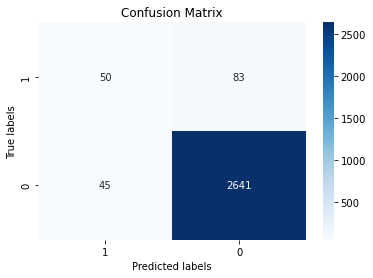

In [64]:
print(f"Number of features: {num_features_basic}")
print(f"Accuracy: {accuracy_score(y_test, y_pred_test)}")
print(f"F1 Score: {f1}")

from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

def plot_confusion_matrix(y_true, y_pred, labels):
    """
    Plot the confusion matrix

    :param y_true: The true labels
    :param y_pred: The predicted labels
    :param labels: The labels to use
    """
    cm = confusion_matrix(y_true, y_pred, labels=labels)
    ax = plt.subplot()
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", ax=ax)
    ax.set_xlabel("Predicted labels")
    ax.set_ylabel("True labels")
    ax.set_title("Confusion Matrix")
    ax.xaxis.set_ticklabels(labels)
    ax.yaxis.set_ticklabels(labels)
    plt.show()

plot_confusion_matrix(y_test, y_pred_test, [1, 0])

In [65]:
### Model Evaluation

from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred_test))


              precision    recall  f1-score   support

           0       0.97      0.98      0.98      2686
           1       0.53      0.38      0.44       133

    accuracy                           0.95      2819
   macro avg       0.75      0.68      0.71      2819
weighted avg       0.95      0.95      0.95      2819



## Model Testing

In [66]:
## Save the model

import joblib

joblib.dump(pipeline, "model.pkl")

## Load the model

model = joblib.load("model.pkl")

model.score(x_test, y_test)

## Predict

0.9545938275984391

In [67]:
!pip install googledrivedownloader

In [68]:
### Python Code to dowload file from google drive

from google_drive_downloader import GoogleDriveDownloader as gdd
gdd.download_file_from_google_drive(file_id='1URSwK6HKKbD2LLokDZI4xhzSj07ShkXm', dest_path='./test_youtube.csv')


In [69]:
you_tube_data = pd.read_csv('test_youtube.csv')

you_tube_data.head()

,CommentId,VideoId,Text,IsToxic,IsAbusive,IsThreat,IsProvocative,IsObscene,IsHatespeech,IsRacist,IsNationalist,IsSexist,IsHomophobic,IsReligiousHate,IsRadicalism
0,Ugg2KwwX0V8-aXgCoAEC,04kJtp6pVXI,If only people would just take a step back and...,False,False,False,False,False,False,False,False,False,False,False,False
1,Ugg2s5AzSPioEXgCoAEC,04kJtp6pVXI,Law enforcement is not trained to shoot to app...,True,True,False,False,False,False,False,False,False,False,False,False
2,Ugg3dWTOxryFfHgCoAEC,04kJtp6pVXI,\nDont you reckon them 'black lives matter' ba...,True,True,False,False,True,False,False,False,False,False,False,False
3,Ugg7Gd006w1MPngCoAEC,04kJtp6pVXI,There are a very large number of people who do...,False,False,False,False,False,False,False,False,False,False,False,False
4,Ugg8FfTbbNF8IngCoAEC,04kJtp6pVXI,"The Arab dude is absolutely right, he should h...",False,False,False,False,False,False,False,False,False,False,False,False


In [70]:
## Select the text column and IsToxic column True

you_tube_data = you_tube_data[["Text", "IsToxic"]]
you_tube_data.head()

#Create New Column Wiit prediction 

you_tube_data["Predicted"] = model.predict(you_tube_data["Text"])



In [71]:
you_tube_data.head()

,Text,IsToxic,Predicted
0,If only people would just take a step back and...,False,0
1,Law enforcement is not trained to shoot to app...,True,1
2,\nDont you reckon them 'black lives matter' ba...,True,0
3,There are a very large number of people who do...,False,0
4,"The Arab dude is absolutely right, he should h...",False,1
